In [38]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join("..")))

from env import Connect4env
from agents import ReplayMemory, MCTS, DQN, train_model
import torch
import numpy as np
import matplotlib.pyplot as plt

env = Connect4env()
replay_memory = ReplayMemory(capacity=10_000)
model = DQN(42,7)
target_model=DQN(42,7)
target_model.load_state_dict(model.state_dict())

optimizer=torch.optim.AdamW(model.parameters(),lr=0.001)

mcts = MCTS(nb_simulations=1000, model=model, memory_buffer=replay_memory)
loss_list=[]

def play_random_games(env, memory, num_games=10000):
    for _ in range(num_games):
        env.reset()
        state = env.board.flatten()
        while env.winner==-1:
            if env.legal_moves==[]:
                break


            action = np.random.choice(env.legal_moves)  
            env.step(action)
            next_state = env.board.flatten()
            reward = 1 if env.winner == env.current_player else -1
            memory.push(state, action, next_state, reward, env.winner)
            state = next_state  


play_random_games(env, replay_memory, num_games=10_000)


            

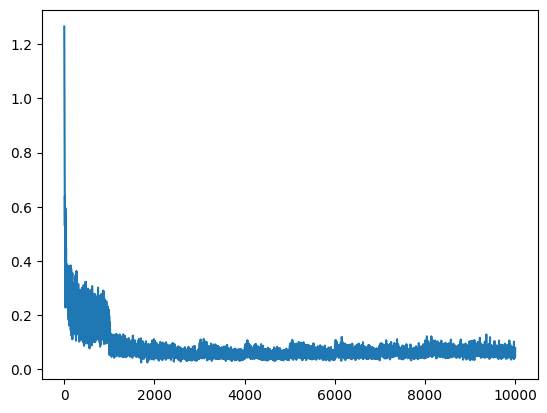

In [39]:
for step in range(10_000):  
    loss_value=train_model(model, target_model, replay_memory, optimizer,step=step,batch_size=256)
    loss_list.append(loss_value)
plt.plot(loss_list)

In [35]:
win_rate_1=0
win_rate_2=0
draw_rate=0
full_rewards={1:[0],2:[0],0:[0]}

for episode in range(50):  
    env.reset()
    while env.winner==-1:
        if env.legal_moves==[]:
            break
        best_move = mcts.search(env)
        env.step(best_move)
    
    if env.winner==1:
        win_rate_1+=1
    if env.winner==2:
        win_rate_2+=1
    if env.winner==0:
        draw_rate+=1

    for p in full_rewards:
        if p==env.winner:
            full_rewards[p].append(full_rewards[p][-1]+1)
        else:
            full_rewards[p].append(full_rewards[p][-1]-1)

    if episode%10==0:
        print(f"Partie {episode + 1} terminée ! . Winrates  player1 :{win_rate_1/10} player 2 :{win_rate_2/10} draw : {draw_rate/10} ")
        win_rate_1=0
        win_rate_2=0
        draw_rate=0

    # Entraîner le modèle après chaque partie
    train_model(model, target_model,replay_memory, optimizer, batch_size=128)

Partie 1 terminée ! . Winrates  player1 :0.0 player 2 :0.1 draw : 0.0 
Partie 11 terminée ! . Winrates  player1 :0.4 player 2 :0.6 draw : 0.0 
Partie 21 terminée ! . Winrates  player1 :0.9 player 2 :0.1 draw : 0.0 
Partie 31 terminée ! . Winrates  player1 :0.2 player 2 :0.8 draw : 0.0 
Partie 41 terminée ! . Winrates  player1 :0.4 player 2 :0.6 draw : 0.0 


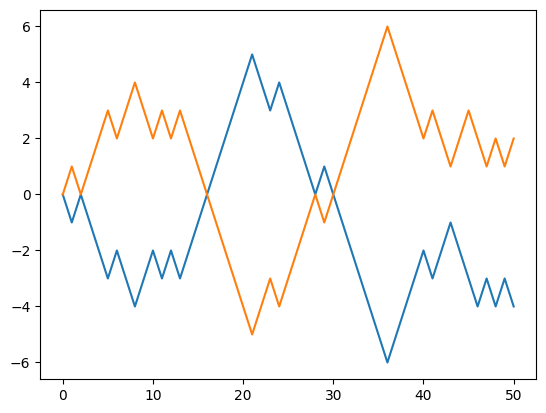

In [37]:
plt.plot(full_rewards[1])
plt.plot(full_rewards[2])

In [32]:
s,l=env.reset()
while env.winner==-1:
    if env.legal_moves==[]:
        break

    print(np.flip(env.board.T))
    sys.stdout.flush()

    next_action=int(input())
    env.step(next_action)


    if env.legal_moves==[] or env.winner!=-1:
        break

    action=mcts.search(env)
    env.step(action)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 2 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 2 0 1 0 2 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 2 0 1 0 2 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0]
 [0 2 0 1 0 2 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 1 0 1 0]
 [0 2 0 1 0 2 2]]
[[0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 1 0 1 0]
 [0 2 0 1 1 2 2]]
[[0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 2 1 0]
 [0 0 0 1 1 1 0]
 [0 2 0 1 1 2 2]]
